Chapter 6
# 用指定色谱绘制三维网格曲面
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
# 导入符号变量
import os

from matplotlib import cm
# 导入色谱模块

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 定义函数

In [2]:
num = 301; # number of mesh grids
x_array = np.linspace(-3,3,num)
y_array = np.linspace(-3,3,num)
xx,yy = np.meshgrid(x_array,y_array)

# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数
ff = f_xy_fcn(xx,yy)

# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

In [3]:
# 查看函数
f_xy

3*(1 - x)**2*exp(-x**2 - (y + 1)**2) - (-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - 0.333333333333333*exp(-y**2 - (x + 1)**2)

### 2. 用plot_surface() 绘制二元函数曲面

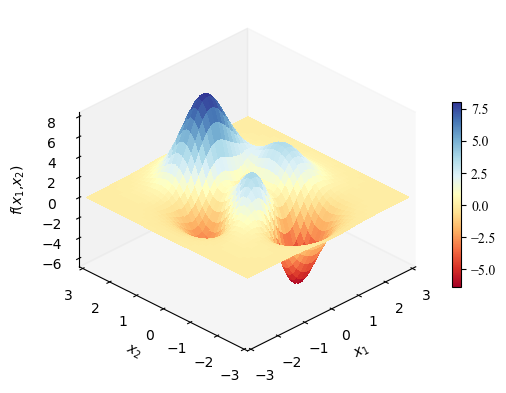

In [4]:

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.set_proj_type('ortho')
#  正交投影模式

surf = ax.plot_surface(xx,yy,ff, cmap=cm.RdYlBu,
                       linewidth=0, antialiased=False)
# 使用 RdYlBu 色谱
# 请大家试着调用其他色谱

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')
# 设定横纵轴标签

ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(y_array.min(), y_array.max())
# 设定横、纵轴取值范围

ax.view_init(azim=-135, elev=30)
# 设定观察视角

ax.grid(False)
# 删除网格

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "10"
# 修改字体、字号

fig.colorbar(surf, shrink=0.5, aspect=20)
# 增加色谱条
fig.savefig('Figures/用plot_surface()绘制二元函数曲面.svg', format='svg')

### 3. 翻转色谱

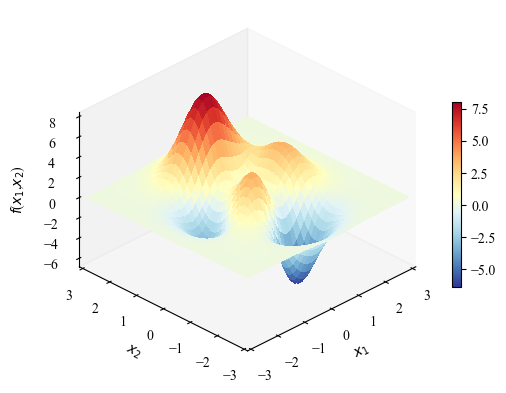

In [5]:

# 使用 RdYlBu_r 色谱
# RdYlBu_r 是 RdYlBu 的调转
# 请大家自行补充注释

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.set_proj_type('ortho')
surf = ax.plot_surface(xx,yy,ff, cmap='RdYlBu_r',
                       linewidth=0, antialiased=False)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(y_array.min(), y_array.max())

ax.view_init(azim=-135, elev=30)

ax.grid(False)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "10"

fig.colorbar(surf, shrink=0.5, aspect=20)
fig.savefig('Figures/翻转色谱.svg', format='svg')

### 4. 只保留网格线

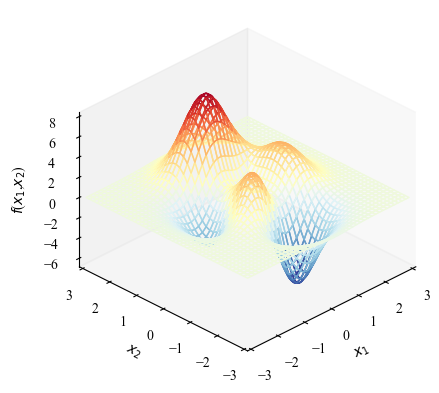

In [6]:
# 同样使用 plot_surface()，不同的是只保留彩色网格
# 请大家自行补齐注释

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.set_proj_type('ortho')
norm_plt = plt.Normalize(ff.min(), ff.max())
colors = cm.RdYlBu_r(norm_plt(ff))
    
surf = ax.plot_surface(xx,yy,ff, 
                       facecolors=colors,
                       linewidth=1, # 线宽
                       shade=False) # 删除阴影

surf.set_facecolor((0,0,0,0))
# 网格面填充为空

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(y_array.min(), y_array.max())

ax.view_init(azim=-135, elev=30)

ax.grid(False)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "10"
fig.savefig('Figures/只保留网格线.svg', format='svg')

### 5. plot_wireframe() 绘制网格曲面 + 三维等高线

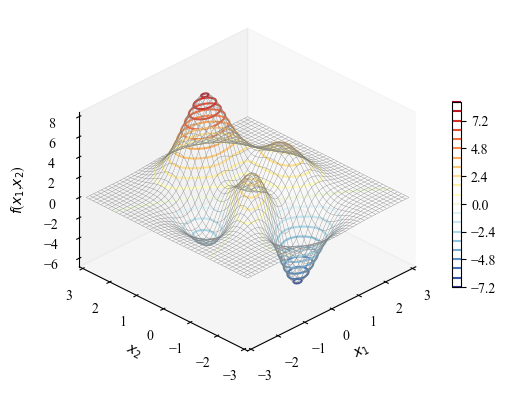

In [7]:
# 在网格曲面基础上，叠加三维等高线
# 请大家补齐注释

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, ff,
                  color = [0.5,0.5,0.5],
                  linewidth = 0.25)

colorbar = ax.contour(xx,yy, ff,20,
             cmap = 'RdYlBu_r')
# 三维等高线

fig.colorbar(colorbar, ax=ax, shrink=0.5, aspect=20)
ax.set_proj_type('ortho')

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(y_array.min(), y_array.max())

ax.view_init(azim=-135, elev=30)
ax.grid(False)
fig.savefig('Figures/plot_wireframe() 绘制网格曲面 + 三维等高线.svg', format='svg')

In [8]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023